In [65]:
%matplotlib inline
import os.path

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.patches as patches
import seaborn as sns

from pathlib import Path

In [66]:
def draw_court(ax = None, color = '#D41E1E', lw = 2):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Define court dimensions
    court_length = 420  # Length of the futsal court in meters
    court_width = 250   # Width of the futsal court in meters
    goal_width = 30  # Width of the goal in meters
    penalty_line_width = 32

    # Create a rectangle for the futsal court
    court_rectangle = patches.Rectangle((0, 0), court_length, court_width, linewidth=lw, edgecolor=color, facecolor='none')
    # Create center circle and midline
    center_circle = patches.Circle((court_length / 2, court_width / 2), radius=30.0, linewidth=lw, edgecolor=color, facecolor='none')
    court_mid_line = patches.Rectangle((210,0), court_length, court_width, linewidth=lw, edgecolor=color, facecolor='none')

    # Create penalty areas
    penalty_line_left = patches.Rectangle((61.2, (court_width - penalty_line_width) / 2), 0, 34, linewidth=lw, edgecolor=color, facecolor='none')
    penalty_line_right = patches.Rectangle((358.4, (court_width - penalty_line_width) / 2), 0, 34, linewidth=lw, edgecolor=color, facecolor='none')
    penalty_area_left_up = patches.Arc((3, court_width / 2), width=120, height=150, theta1=16, theta2=180, linewidth=lw, edgecolor=color, facecolor='none')
    penalty_area_left_down = patches.Arc((3, court_width / 2), width=120, height=150, theta1=180, theta2=-15.8, linewidth=lw, edgecolor=color, facecolor='none')
    penalty_area_right_up = patches.Arc((court_length - 3, court_width / 2), width=120, height=150, theta2=164, linewidth=lw, edgecolor=color, facecolor='none')
    penalty_area_right_down = patches.Arc((court_length - 3, court_width / 2), width=120, height=150, theta1=-164.3, linewidth=lw, edgecolor=color, facecolor='none')

    # Create goals
    goal_left = patches.Rectangle((-0.5, (court_width - goal_width) / 2), 0.5, goal_width, linewidth=6, edgecolor='red', facecolor='none')
    goal_right = patches.Rectangle((court_length, (court_width - goal_width) / 2), 0.5, goal_width, linewidth=6, edgecolor='red', facecolor='none')

    # Create kick spot
    kickoff_spot = patches.Circle((court_length / 2, court_width / 2), radius=2.3, linewidth = lw, edgecolor=color, fill = False)
    penalty_spot_left = patches.Circle((61.2, 125), radius=2.3, linewidth=lw, edgecolor=color, fill = False)
    penalty_spot_right = patches.Circle((358.2, 125), radius=2.3, linewidth=lw, edgecolor=color, fill = False)

    # Set axis limits
    ax.set_xlim(-1, court_length + 1)
    ax.set_ylim(-1, court_width + 1)

    # Set axis aspect ratio to equal
    ax.set_aspect('equal')

    court_elements = [
        court_rectangle,
        center_circle,
        court_mid_line,
        penalty_line_left,
        penalty_line_right,
        penalty_area_left_up,
        penalty_area_left_down,
        penalty_area_right_up,
        penalty_area_right_down,
        goal_left,
        goal_right,
        kickoff_spot,
        penalty_spot_left,
        penalty_spot_right
    ]

    for element in court_elements:
        ax.add_patch(element)

    return ax


In [67]:
def show_futsal_chart(shooter):

    court_length = 420  # Length of the futsal court in meters
    court_width = 250   # Width of the futsal court in meters

    sns.set_style('whitegrid')
    px = 1/plt.rcParams['figure.dpi']
    fpath = Path(mpl.get_data_path(), "fonts/ttf/MYRIADPRO-BOLD.otf")

    fig, ax = plt.subplots(figsize = (1080*px, 975*px))
    fig.patch.set_facecolor('#1F2132')
    ax.set_facecolor('#1F2132')
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_tick_params(labelbottom = 'off')
    ax.yaxis.set_tick_params(labelleft = 'off')

    ax.set_xticks([])
    ax.set_yticks([])
    
    for i in range(len(shooter['Event'])):
        if shooter['Event'][i] == "Shot":
            plt.scatter(shooter[(shooter['Event']=="Shot")].X*4,
                        shooter[(shooter['Event']=="Shot")].Y*2.5,
                        s = 150,
                        marker= '^', 
                        color = '#91FC70', 
                        edgecolors = '#403C3B', 
                        linewidth = 1.5, 
                        alpha = 1, 
                        zorder = 4)
        elif shooter['Event'][i] == "Pass":
            plt.scatter(shooter[(shooter['Event']=="Pass")].X*4,
                        shooter[(shooter['Event']=="Pass")].Y*2.5,
                        s = 150,
                        marker= 'o', 
                        color = '#91FC70', 
                        edgecolors = '#403C3B', 
                        linewidth = 1.5, 
                        alpha = 1, 
                        zorder = 4)
    
    plt.gca().set_aspect('equal')
    
                         
    draw_court(ax = ax)
    
    plt.show()

In [68]:
player_positions_df = pd.read_csv('events_dummy.csv')
player_positions_df.loc[0, 'X2'] = 0
player_positions_df.loc[0, 'Y2'] = 0
player_positions_df['Y'] = 100 - player_positions_df['Y']
player_positions_df

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Home,H1,Shot,0,0,18,59,0,0
1,Home,H2,Pass,0,0,41,91,30,22


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


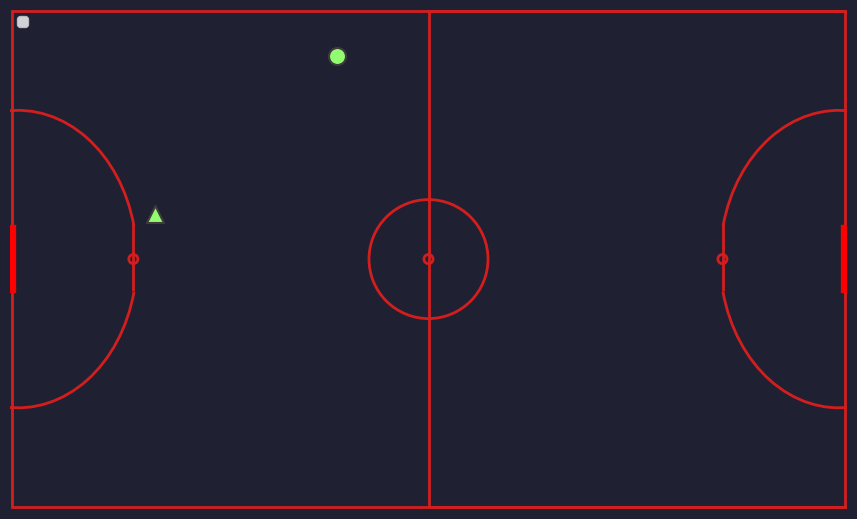

In [69]:
show_futsal_chart(player_positions_df)